In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [40]:
from sklearn import linear_model
import statsmodels.api as sm
from scipy.stats import norm
from sklearn.metrics import r2_score


# Data 

The Diabetes prediction dataset encompasses a diverse set of features, including age, gender, BMI, hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. These features offer a comprehensive view of patients' health profiles, making it an ideal dataset for developing predictive models. The ultimate goal is to assist healthcare professionals in identifying individuals at risk of diabetes and to contribute to the development of personalized treatment plans.

## Data Import 

In [41]:
df = pd.read_csv("Diabetes Dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Exploratory Graphical Analysis

## Age Distribution 

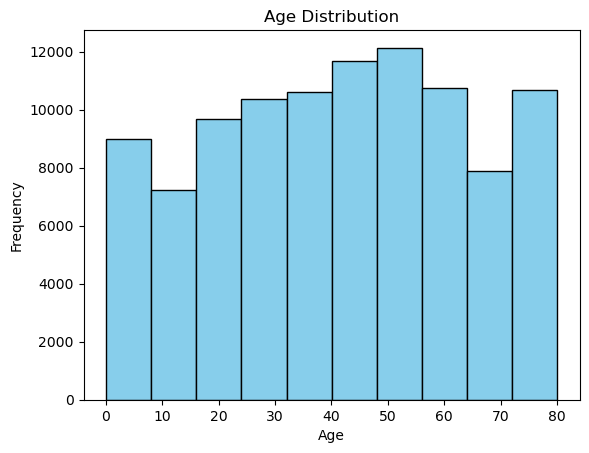

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

In [42]:
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
 
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
 
plt.show()
df['age'].describe()

We can see an average age of approximately 41.89 years and a standard deviation of about 22.52, highlighting variability. Ranging ages from 0.08 to 80 years, the data suggests a slightly positively skewed distribution, with 25%, 50%, and 75% of individuals below the ages of 24, 43, and 60. The presence of outliers is implied by the minimum and maximum age values. The majority of individuals fall within the 24 to 60-year age range, reflecting a diverse spread of ages.

## Gender Comparison  

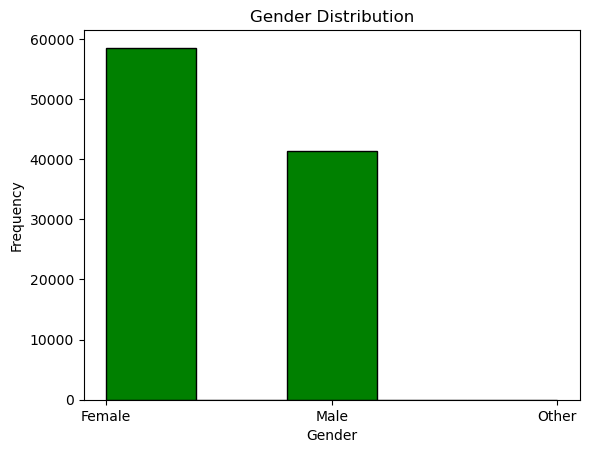

In [43]:
plt.hist(df['gender'], bins=5, color='green', edgecolor='black')
 
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Distribution')
 
plt.show()

A trend emerges from the dataset,  a pronounced representation of females compared to males. With nearly 60,000 instances attributed to females and approximately 40,000 to males, the data underscores a substantial gender disparity favoring females.

## Body Mass Index Distribution

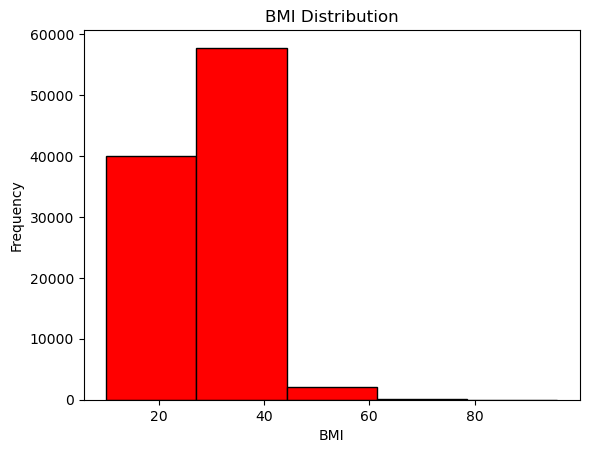

count    100000.000000
mean         27.320767
std           6.636783
min          10.010000
25%          23.630000
50%          27.320000
75%          29.580000
max          95.690000
Name: bmi, dtype: float64

In [44]:
plt.hist(df['bmi'], bins=5, color='red', edgecolor='black')
 
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
 
plt.show()
df['bmi'].describe()

The observed mean BMI of approximately 27.32 indicates that, on average, patients in the dataset fall within the overweight category (BMI 25–29.9). This finding suggests a notable prevalence of overweight individuals among the patient population. Moreover, considering that the dataset likely skews towards overweight and obese patients, there may be an elevated risk factor for conditions such as diabetes, which is often associated with higher BMI values. Patients within the overweight and obese BMI ranges are known to have increased susceptibility to diabetes, among other health complications.

# Data Review and Exploration 

## Missing Data Review


This is a preliminary review conducted for our data exploration and preprocessing phase aimed at identifying any missing data or null values within the diabetes dataset. The purpose is to ensure data integrity and readiness for subsequent analyses or model training.


In [45]:
diabetes_nan = df.isna().sum()

print(diabetes_nan)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


## Descriptive Statistics 

While we conducted some descriptive statistics during our graphical exploration, performing a comprehensive analysis of the entire dataset can yield valuable insights. This function serves as a rapid check for the diabetes data integrity, revealing missing values and pinpointing outliers that could impact our modeling endeavors. It also facilitates data cleaning, preprocessing, and initial exploration tasks, enhancing the overall understanding of the dataset's characteristics and informing subsequent decisions.

In [46]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## Types, Shape, and Columns

understanding our data types, shape, and columns of the dataset is essential. Knowing the number of rows and columns (shape) helps us gauge the dataset's size and complexity. Identifying data types aids with our interpreting data lets the team know if any preprocessing needs to occur to any columns before model creation. Clear column names facilitate comprehension of the data's content.

In [47]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [48]:
print(df.shape)

(100000, 9)


In [49]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

# Data Processing 

## Gender

During the graphical exploration of the dataset, it was noted that the "gender" feature included a third category labeled as "other", which affected only a small percentage of the data. For the purpose of building a prediction model based on traditional biological features of gender, the "other" category will be excluded from the gender feature. Subsequently, the remaining categories will be converted into dummy indicators. This process involves representing each category with binary values (0 or 1), enabling the model to effectively interpret and utilize gender information in its predictions.

In [50]:
df2 = df

In [51]:
df2['gender'].replace({'Female':0,'Male':1}, inplace=True)

In [52]:
df2['gender'].value_counts()

0        58552
1        41430
Other       18
Name: gender, dtype: int64

In [53]:
df2 = df2.drop(df2[df2['gender'] == 'Other'].index)

In [54]:
df2['gender'].value_counts()

0    58552
1    41430
Name: gender, dtype: int64

In [55]:
df2['gender'] = df2['gender'].astype('int64')

In [56]:
df2.dtypes

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

## Smoking History 

The "Smoking History" column represents a categorical variable encompassing six distinct features, each reflecting various aspects of individuals' smoking habits. To effectively utilize this information in our predictive models, it necessitates transformation into indicator variables. 

In [57]:
df2['smoking_history'].value_counts()

No Info        35810
never          35092
former          9352
current         9286
not current     6439
ever            4003
Name: smoking_history, dtype: int64

In [58]:
df2['smoking_history'].replace({'never':0,'current':1, 'No Info':2, 'former':3, 'ever':4, 'not current': 5}, inplace=True)

In [59]:
df2['smoking_history'].value_counts()

2    35810
0    35092
3     9352
1     9286
5     6439
4     4003
Name: smoking_history, dtype: int64

In [60]:
df2.dtypes

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

## Type Uniformity 

In the final stage of our data processing, we aim to standardize all variable types to a consistent format of float64. This uniformity ensures compatibility and coherence across the dataset, facilitating seamless model creation and analysis. By converting all variables to float64, we establish a standardized numerical representation that simplifies data handling and enhances the interoperability of various modeling.

In [61]:
df3 = df2.astype('float64')

In [62]:
df3.dtypes

gender                 float64
age                    float64
hypertension           float64
heart_disease          float64
smoking_history        float64
bmi                    float64
HbA1c_level            float64
blood_glucose_level    float64
diabetes               float64
dtype: object

# Modeling

### Data Model 1 - KNN

K-Nearest Neighbors (KNN) stands out as a straightforward yet powerful algorithm employed in supervised machine learning, applicable to both classification and regression tasks. Given its versatility and ability to capture patterns from data, we anticipate that KNN holds promise as an optimal model for predicting diabetes.

In [63]:
X = df3.drop('diabetes', axis=1) # features 
y = df3['diabetes'] # target 

In [64]:
# splitting data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# creating a pipeline to scale features and apply KNN for classification 
pipeline = Pipeline([('scaler', MinMaxScaler()),('classifier', KNeighborsClassifier())])

In [66]:
# fitting to the training  
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', KNeighborsClassifier())])

In [67]:
# accuracy of the knn
accuracy = pipeline.score(X_test, y_test)

print("The accuracy of the KNN classifier from the test set is: {:.2f}".format(accuracy*100),"%")

The accuracy of the KNN classifier from the test set is: 96.03 %


In [68]:
from sklearn.model_selection import GridSearchCV

# define a range of hyperparameters to search
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11], 
    'classifier__weights': ['uniform', 'distance'], 
    'classifier__p': [1, 2],  
}

# perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# get the best k-value
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# get the accuracy score with the best parameters
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy with Best Hyperparameters:", accuracy)

Best Hyperparameters: {'classifier__n_neighbors': 9, 'classifier__p': 1, 'classifier__weights': 'uniform'}
Accuracy with Best Hyperparameters: 0.9611441716257438


The initial accuracy of the K-nearest neighbors KNN classifier on the test set was 96.03%, indicating a strong predictive performance for diabetes. To further optimize the model, hyperparameter tuning was conducted using grid search with 5 fold validation. The grid search explored various combinations of hyperparameters including the number of neighbors, weight function, and distance metric. After evaluating, the best hyperparameters were identified as having 9 neighbors, using a uniform weight function. With these optimal parameters, the accuracy of the KNN  on the test set slightly improved to approximately 96.11% for predicting diabetes. 

### Data Model 2 - Linear Regression

While the KNN model yielded an impressive accuracy rate of 96.11%, we acknowledge the potential benefits of complementing its performance with the inclusion of a linear regression model. By integrating a linear regression approach, we anticipate the opportunity to explore additional insights and potentially uncover nuances within the dataset that the KNN model might overlook. The integration of diverse modeling techniques allows for a comprehensive evaluation of predictive capabilities and provides a strong framework for comparative analysis.

In [69]:
# regression model 
model = linear_model.LinearRegression()

In [70]:
# fit 
model.fit(X,y)

LinearRegression()

In [71]:
# ordinary least squares
model = sm.OLS(y_train, X_train).fit() # estimates parameters  that minimize the sum of the squared differences

In [72]:
# predict on the test set 
prediction = model.predict(X_test)

In [73]:
print("The R^2 score of the Linear Regression model is: {:.2f}".format(r2_score(y_test, prediction)))

The R^2 score of the Linear Regression model is: 0.16


A score of 0.16 for a linear regression model suggests that the model explains only 16% of the variance in the dependent 

In [74]:
# predictions on the test data for KNN
y_pred = pipeline.predict(X_test)

# r2 score for KNN
r2 = r2_score(y_test, y_pred)
print("The R^2 score of the KNN classifier on the test set is: {:.2f}".format(r2))


The R^2 score of the KNN classifier on the test set is: 0.51


# Summary 

The comparison between a Linear Regression model and a KNN classifier reveals distinct performance characteristics on a test data. The Linear Regression model exhibits an R squared  score of 0.16, indicating that it explains only 16% of the variance in the target diabetes. In contrast, the KNN classifier achieves a notably higher R^2 score of 0.51, indicating that it captures 51% of the variance in the target. Additionally, the KNN classifier demonstrated an accuracy of 96.03% on the test set, showcasing its ability to correctly predict the target variable for a significant portion of observations. The results collectively suggest that the KNN classifier outperforms the Linear Regression model in terms of predictive accuracy and capturing underlying patterns within the data. As such, the KNN classifier emerges as the more suitable choice for modeling and predicting diabetes.